In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
yelp  = pd.read_csv('yelp.csv')

In [10]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [11]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [12]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [13]:
yelp['lenght']= yelp['text'].apply(len)

#### EDA

<Figure size 720x576 with 0 Axes>

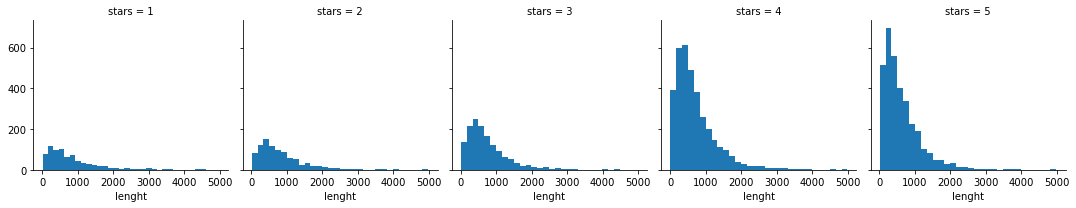

In [14]:
plt.figure(figsize=(10,8))
g =sns.FacetGrid(yelp,col='stars')
g.map(plt.hist, 'lenght',bins =30)
plt.show()

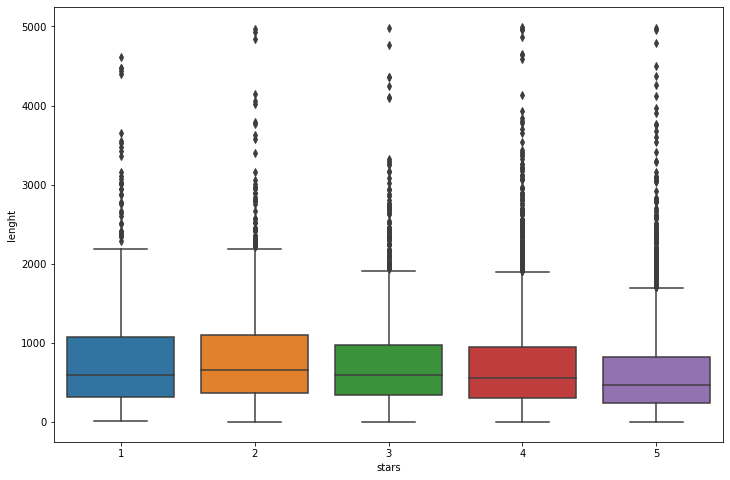

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(data=yelp,x = 'stars', y= 'lenght')
plt.show()

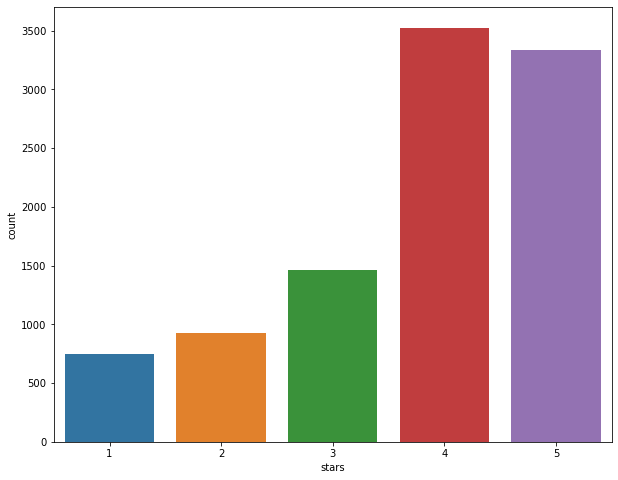

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data = yelp, x= 'stars')
plt.show()

In [17]:
grp_mean =yelp.groupby(by='stars').mean()
grp_mean

,cool,useful,funny,lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [18]:
grp_corr =grp_mean.corr()

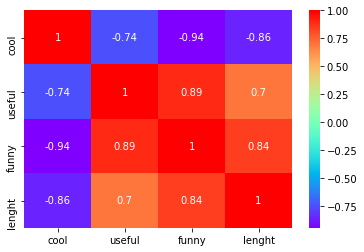

In [19]:
sns.heatmap(data=grp_corr,cmap ='rainbow',annot=True)
plt.show()

#### NLP Classification Task

In [20]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [21]:
yelp_class['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [22]:
X =yelp_class['text']
y =yelp_class['stars']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv =CountVectorizer()

In [25]:
X= cv.fit_transform(X)

#### Train test split 

In [26]:
from  sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

#### Training a Model

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
nb=MultinomialNB()

In [30]:
nb.fit(X_train,y_train)

MultinomialNB()

#### Predictions and Evaluations

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
prediction = nb.predict(X_test)

In [33]:
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



[[159  69]
 [ 22 976]]


## Using Text Processing

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

In [37]:
pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()),# integer counts to weighted term frequency-inverse document frequency scores
    ('classifier', MultinomialNB()),
]) ## train on  vectors w/ Naive Bayes classifier 

#### Train Test Split

In [38]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [39]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

#### Predictions and Evaluation

In [40]:
predictions = pipeline.predict(X_test)

In [41]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



[[  0 228]
 [  0 998]]


C:\Users\Tapiwanashe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


we can use other classifiers eg the Random Forest classifier to test the pipeline.

The text processing method produces a poor model